<a href="https://colab.research.google.com/github/ViniciusCastillo/BootcampAlura_ProjetoModulo3/blob/main/notebooks/Comparacao_Projecoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook de avalição comparativa de projeções
O objetivo deste projeto será comparar algumas projeções feitas em níveis distintos e avaliar qual delas possui uma melhor aderência com os dados futuros do último mês da base (novembro de 2021).

Teremos algumas avaliações, sendo que a ideia principal passa por comparar 4 formas distintas de projetar os dados de óbitos por covid no total do Brasil:
* partindo dos dados do Brasil como um todo;
* partindo dos dados por Região do Brasil;
* partindo dos dados por Estado do Brasil;
* partindo dos dados das maiores cidades do Brasil e extrapolando para todo.

Algumas funções e o tratamento inicial dos dados foram feitos em um outro notebook, caso queiram entender melhor acessem [Funcoes_Dados.ipynb](https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo3/blob/main/notebooks/Funcoes_Dados.ipynb). Lembrando que as informações originais foram retiradas do [Brasil.io](https://brasil.io/dataset/covid19/caso_full/) e mantive informações até a data do dia 30 de novembro de 2021.


## Carregando notebook de funções e dados

In [1]:
!git clone "https://github.com/ViniciusCastillo/BootcampAlura_ProjetoModulo3" #clona o github para utilizarmos os arquivos

Cloning into 'BootcampAlura_ProjetoModulo3'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 59 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.


In [ ]:
%run '/content/BootcampAlura_ProjetoModulo3/notebooks/Funcoes_Dados.ipynb' #roda o arquivo com as funções e os dados

## Projetando pela informação diária

### dados consolidados do Brasil

#### definição de tamanho e criação das bases de treino e de teste

In [9]:
tamanho = dados_Brasil.shape[0]
inicia_teste = tamanho-30

In [10]:
df_treino, df_teste = cria_DFs(dados_Brasil, 'new_deaths', inicia_teste)

#### buscando o modelo mais aderente

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


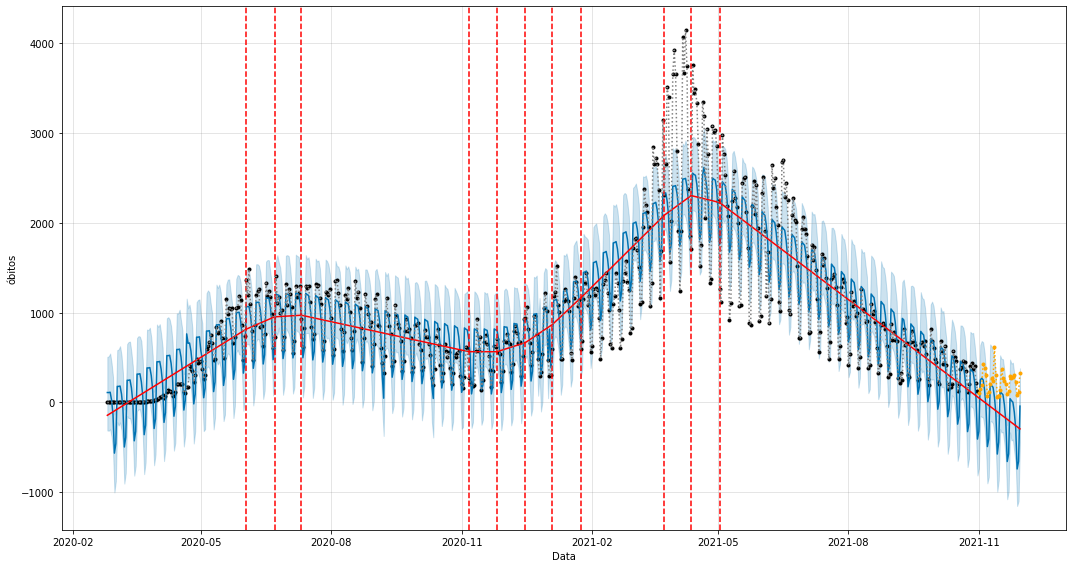

In [20]:
modelo_Brasil, previsao_Brasil = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


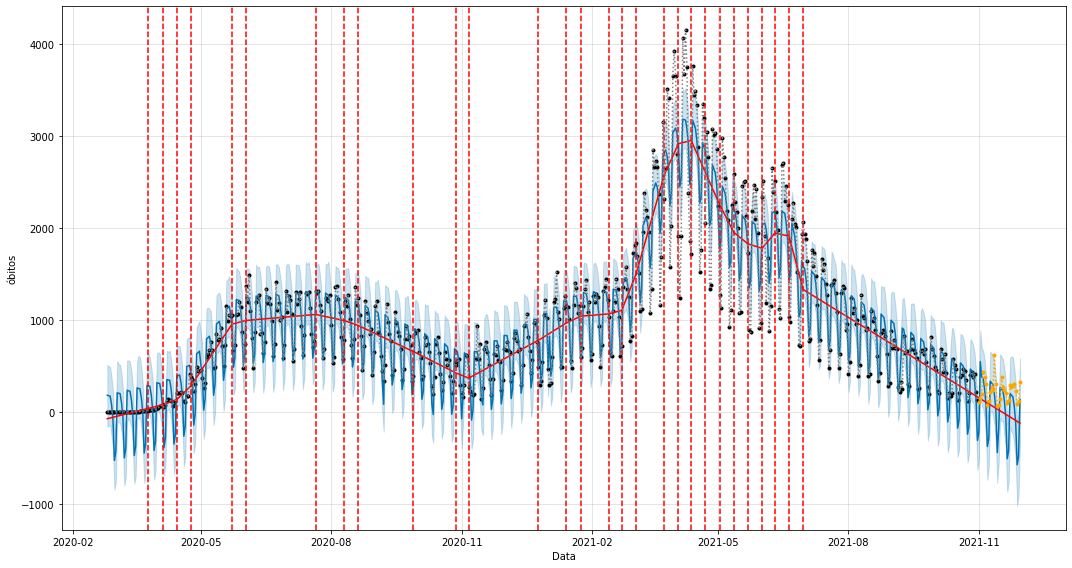

In [24]:
modelo_Brasil, previsao_Brasil = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoint_prior_scale=5, n_changepoints=50)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


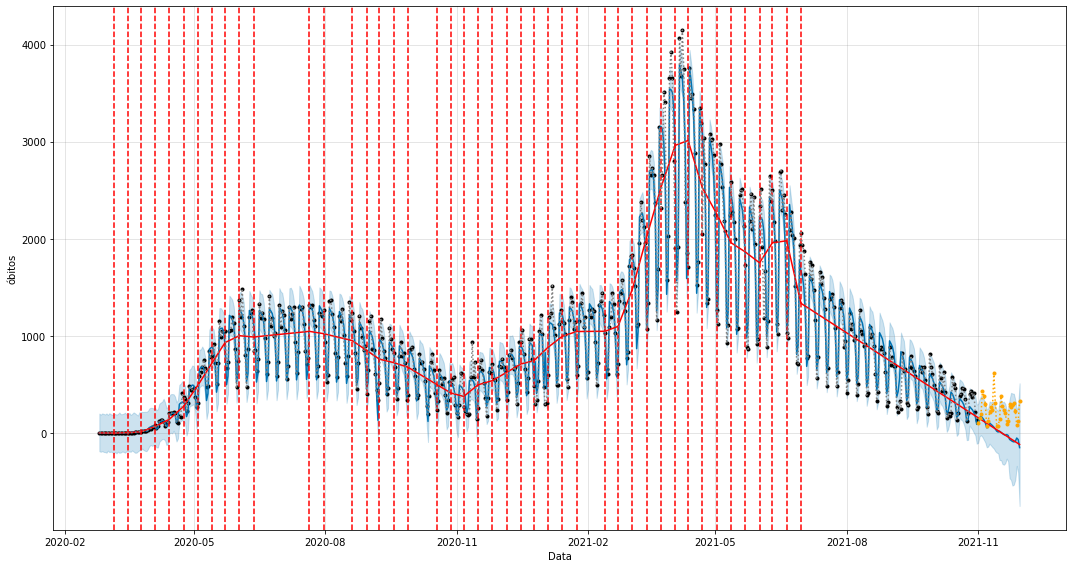

In [60]:
modelo_Brasil, previsao_Brasil = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoint_prior_scale=5, n_changepoints=50, seasonality_mode='multiplicative')

#### O modelo que graficamente pareceu mais aderente foi quando eu defini os changepoints

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


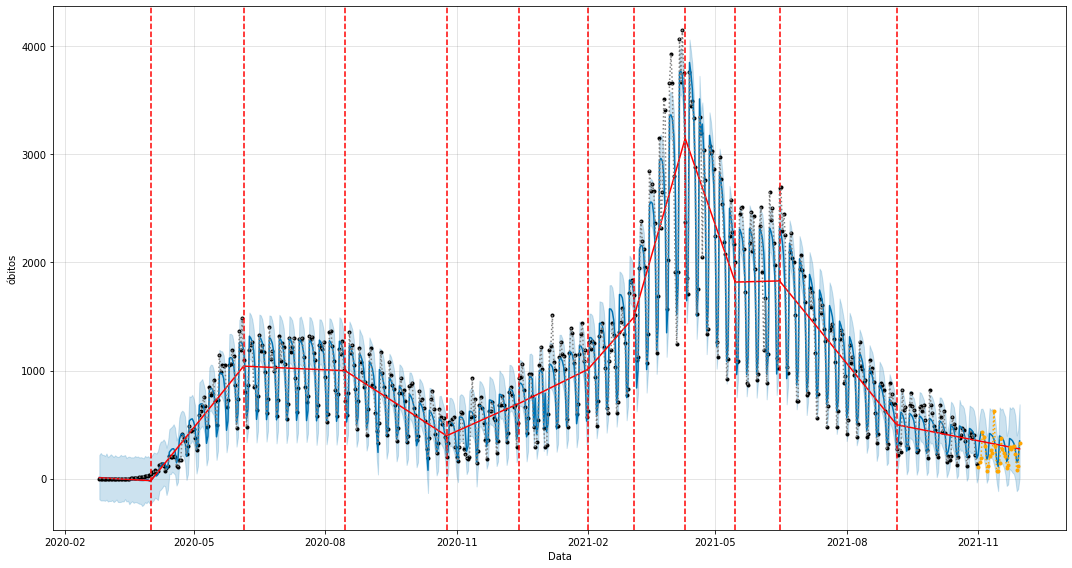

In [174]:
# opção 1: sem sazonalidade anual
lista_changepoints = ['2020-04-01','2020-06-05','2020-08-15','2020-10-25','2020-12-15','2021-02-01',
                      '2021-03-05','2021-04-10','2021-05-15','2021-06-15','2021-09-05']
modelo_Brasil_01, previsao_Brasil_01 = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoints=lista_changepoints, changepoint_prior_scale=5, seasonality_mode='multiplicative')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


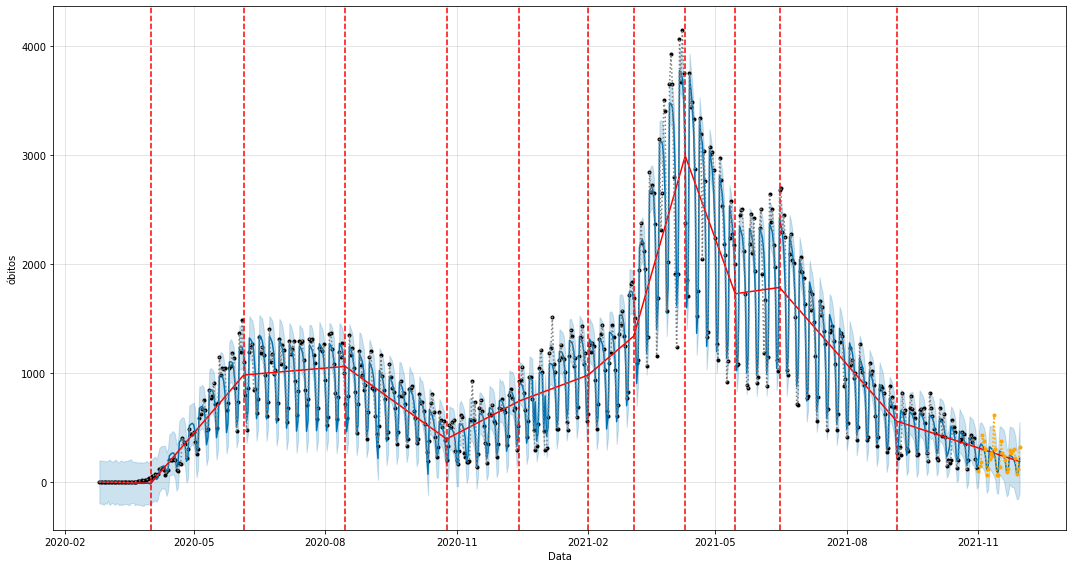

In [173]:
# opção 2: com sazonalidade anual
lista_changepoints = ['2020-04-01','2020-06-05','2020-08-15','2020-10-25','2020-12-15','2021-02-01',
                      '2021-03-05','2021-04-10','2021-05-15','2021-06-15','2021-09-05']
modelo_Brasil_02, previsao_Brasil_02 = modelar(df_treino, df_teste,'óbitos',show_change_points=True, countryName='BR', 
                                         changepoints=lista_changepoints, changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                         yearly_seasonality=True)

In [175]:
print ("Comparando os modelos com a base teste")
metricas(df_teste, previsao_Brasil_01[inicia_teste:],"Modelo 1")
metricas(df_teste, previsao_Brasil_02[inicia_teste:],"Modelo 2")

Comparando os modelos com a base teste

Modelo 1
Mean Absolute Error: 93.96
Root Mean Squared Error: 14,133.08
Mean Absolute Percentage Error: 0.58

Modelo 2
Mean Absolute Error: 70.09
Root Mean Squared Error: 9,647.73
Mean Absolute Percentage Error: 0.33


O segundo modelo que utiliza a sazonalidade anual acabou tendo uma aderência melhor com a base de teste. Ele será utilizado para comparação com os demais modelos

### partindo dos dados por região

#### definição de tamanho e criação das bases de treino e de teste

In [85]:
regioes = dados_regioes['regiao'].unique()
bases_regiao = {}
inicio_teste = {}
df_treino_regiao = {}
df_teste_regiao = {}
for regiao in regioes:
  bases_regiao[regiao] = dados_regioes.query('regiao == @regiao')
  inicio_teste[regiao] = bases_regiao[regiao].shape[0]-30
  df_treino_regiao[regiao], df_teste_regiao[regiao] = cria_DFs(bases_regiao[regiao],'new_deaths',inicio_teste[regiao])
modelo_regiao = {}
previsao_regiao = {}

#### Modelo Região 0: Centro-Oeste

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Centro-Oeste


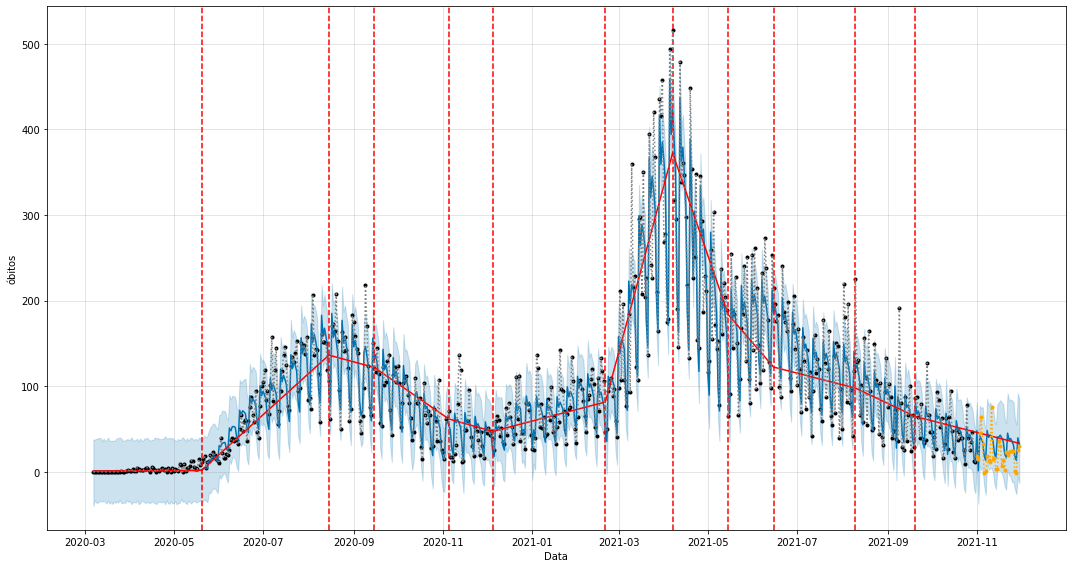

In [176]:
r = 0 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-05-20','2020-08-15','2020-09-15','2020-11-05','2020-12-05',
                      '2021-02-20','2021-04-07','2021-05-15','2021-06-15','2021-08-10','2021-09-20']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

#### Modelo Região 1: Nordeste

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Nordeste


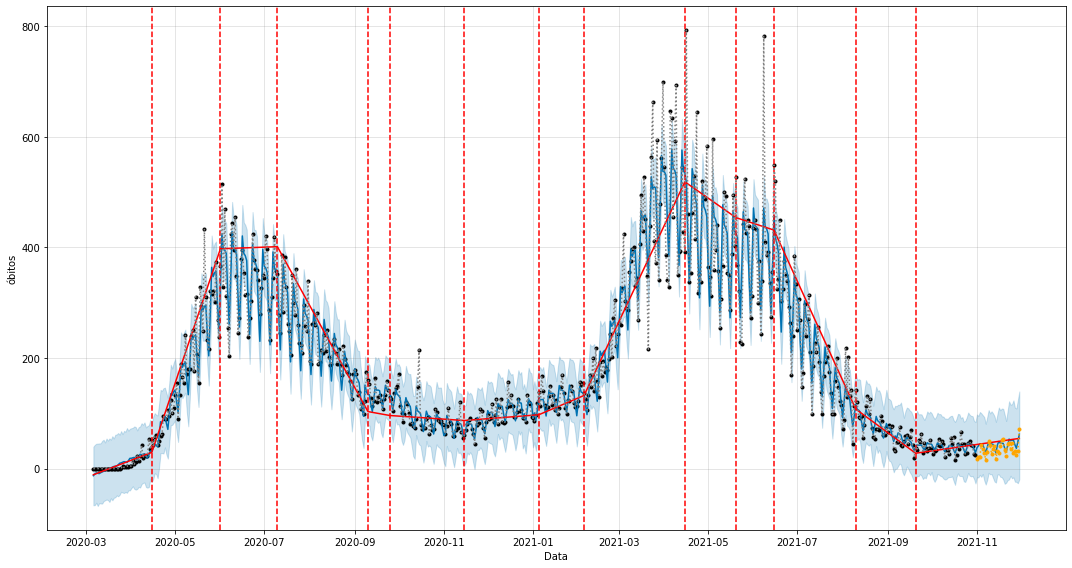

In [177]:
r = 1 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-15','2020-06-01','2020-07-10','2020-09-10','2020-09-25','2020-11-15',
                      '2021-01-05','2021-02-05','2021-04-15','2021-05-20','2021-06-15','2021-08-10','2021-09-20']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

#### Modelo Região 2: Norte

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Norte


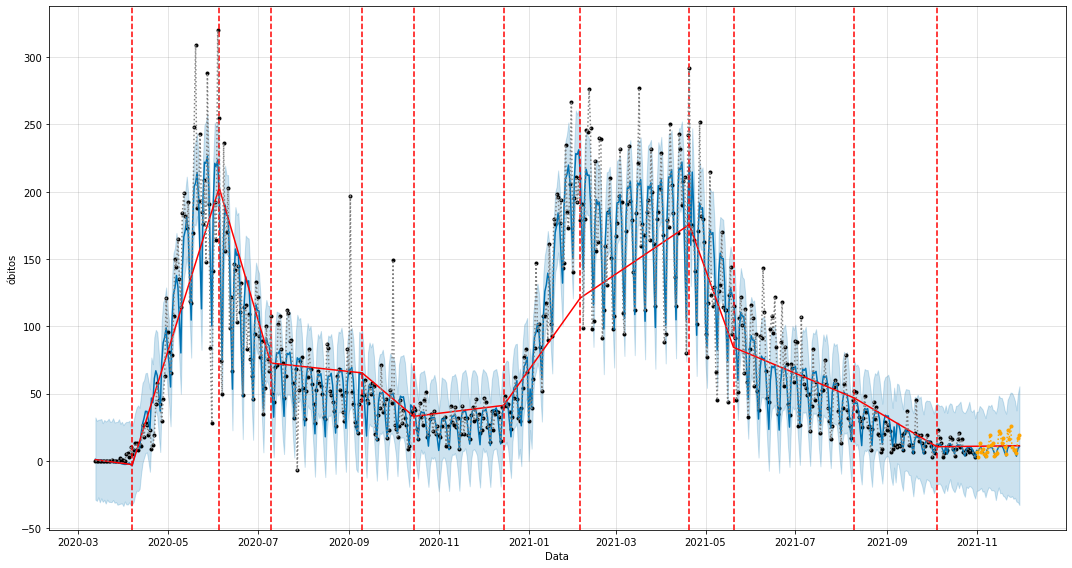

In [178]:
r = 2 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-07','2020-06-05','2020-07-10','2020-09-10','2020-10-15','2020-12-15',
                      '2021-02-05','2021-04-20','2021-05-20','2021-08-10','2021-10-05']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

#### Modelo Região 3: Sudeste


Sudeste


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


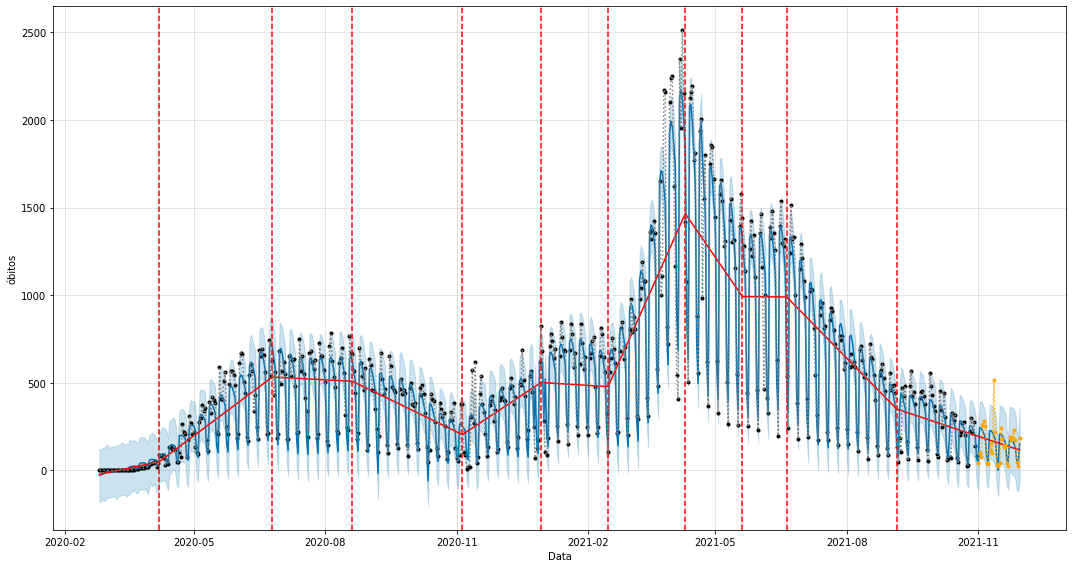

In [189]:
r = 3 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-07','2020-06-25','2020-08-20','2020-11-05','2020-12-30',
                      '2021-02-15','2021-04-10','2021-05-20','2021-06-20','2021-09-05']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

Modelo Região 4: Sul

In [ ]:
r = 4 # código a região analisada
print ("\n"+regioes[r])
lista_changepoints = ['2020-04-07','2020-06-05','2020-07-10','2020-09-10','2020-10-15','2020-12-15',
                      '2021-02-05','2021-04-20','2021-05-20','2021-08-10','2021-10-05']
modelo_regiao[regioes[r]], previsao_regiao[regioes[r]] = modelar(df_treino_regiao[regioes[r]], df_teste_regiao[regioes[r]], 'óbitos', 
                                                                 show_change_points=True, countryName='BR', changepoints=lista_changepoints, 
                                                                 changepoint_prior_scale=5, seasonality_mode='multiplicative', 
                                                                 yearly_seasonality=True)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Sul
